# Leads Score - Case_Study 

## Problem Statement

An X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’..........

## Goals of the Case Study

* There are quite a few goals for this case study:

  * Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
  
  * There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

# Importing 
# required packages &

# Supress Warnings

In [601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

# A : Loading and Cleaning Data
## A.1 : Import Data

In [602]:
LS = pd.read_csv("Leads.csv")
LS.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## A.2 : get shape, info & Describe the dataframe

### This helps to give a good idea of the dataframes.

In [603]:
LS.shape

(9240, 37)

In [604]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [605]:
# already we show non_null is present in whole data_set
# but specily we have a function to know null values .

LS.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [606]:
round(100*(LS.isnull().sum()/len(LS.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [607]:
LS.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#  A.3 : Cleaning the dataframe

In [608]:
# 1st Converting all the values to lower case
LS = LS.applymap(lambda s:s.lower() if type(s) == str else s)

# Replacing 'Select' with NaN (Since it means no option is selected)
LS = LS.replace('select',np.nan)

# Checking if there are columns with one unique value since it won't affect our analysis
LS.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [609]:
# ACCORDING TO INFO OF DATA WE CLEARLY DISTRIBUTE THE NUMARICAL AND CATEGORICAL VARIABLES .
LS.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [610]:
# Dropping unique valued columns
LS_1= LS.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [611]:
# Checking the percentage of missing values
round(100*(LS_1.isnull().sum()/len(LS_1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [612]:
LS_1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [613]:
# Removing all the columns that are no required and have 35% null values
LS_2 = LS_1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
LS_2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [614]:
# Rechecking the percentage of missing values
round(100*(LS_2.isnull().sum()/len(LS_2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. 
So, instead we are going to replace the NaN values with 'not provided'. 
This way we have all the data and almost no null values. 
In case these come up in the model, it will be of no use and we can drop it off then.___

In [615]:
LS_2['Specialization'] = LS_2['Specialization'].fillna('not provided') 
LS_2['What matters most to you in choosing a course'] = LS_2['What matters most to you in choosing a course'].fillna('not provided')
LS_2['Country'] = LS_2['Country'].fillna('not provided')
LS_2['What is your current occupation'] = LS_2['What is your current occupation'].fillna('not provided')
LS_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [616]:
# Rechecking the percentage of missing values
round(100*(LS_2.isnull().sum()/len(LS_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [617]:
LS_2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [618]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

LS_2['Country'] = LS_2.apply(lambda x:slots(x['Country']), axis = 1)
LS_2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [619]:
# Rechecking the percentage of missing values
round(100*(LS_2.isnull().sum()/len(LS_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [620]:
# Checking the percent of lose if the null values are removed
round(100*(sum(LS_2.isnull().sum(axis=1) > 1)/LS_2.shape[0]),2)

1.48

In [621]:
LS_3 = LS_2[LS_2.isnull().sum(axis=1) <1]

# Code for checking number of rows left in percent
round(100*(LS_3.shape[0])/(LS.shape[0]),2)

98.2

In [622]:
# Rechecking the percentage of missing values
round(100*(LS_3.isnull().sum()/len(LS_3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [623]:
# To familiarize all the categorical values
for column in LS_3:
    print(LS_3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      12

In [624]:
# Removing Id values since they are unique for everyone
LS_final = LS_3.drop('Prospect ID',1)
LS_final.shape

(9074, 21)

# B : EDA
## B.1 : Univariate Analysis
### B.1.1 : Categorical Variables

In [625]:
LS_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

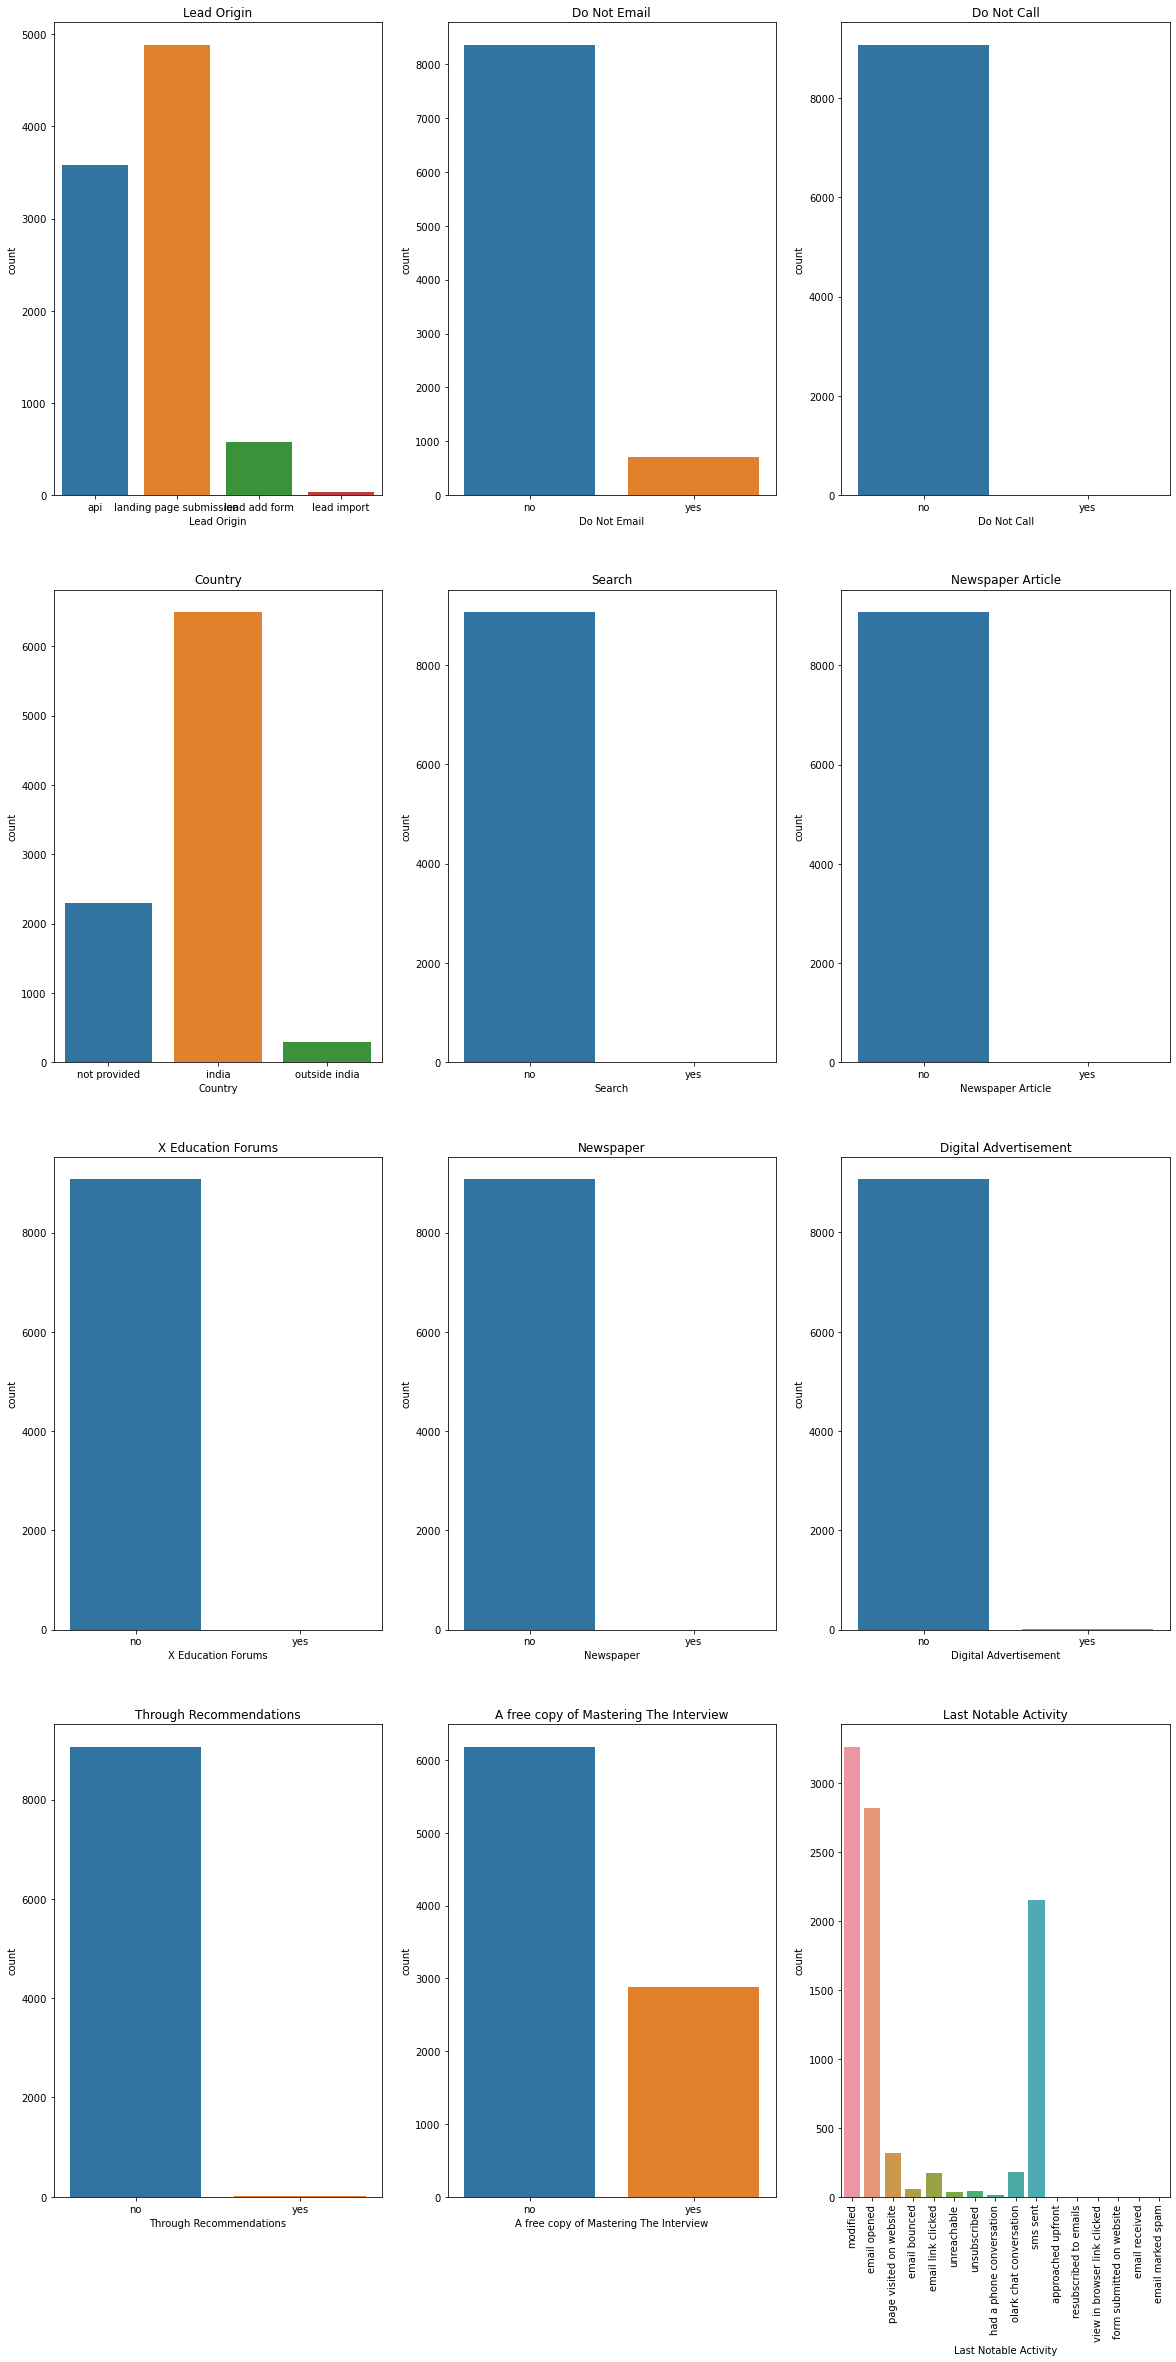

In [626]:
plt.figure(figsize = (20,40))

plt.subplot(4,3,1)
sns.countplot(LS_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(4,3,2)
sns.countplot(LS_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,3,3)
sns.countplot(LS_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(4,3,4)
sns.countplot(LS_final['Country'])
plt.title('Country')

plt.subplot(4,3,5)
sns.countplot(LS_final['Search'])
plt.title('Search')

plt.subplot(4,3,6)
sns.countplot(LS_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(4,3,7)
sns.countplot(LS_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(4,3,8)
sns.countplot(LS_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(4,3,9)
sns.countplot(LS_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(4,3,10)
sns.countplot(LS_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(4,3,11)
sns.countplot(LS_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,3,12)
sns.countplot(LS_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

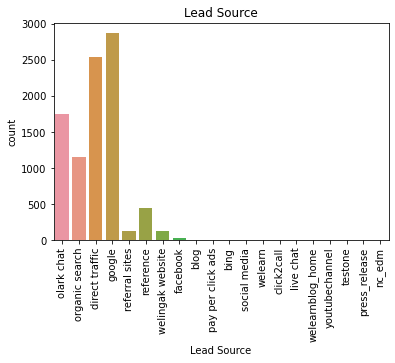

In [627]:
sns.countplot(LS_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

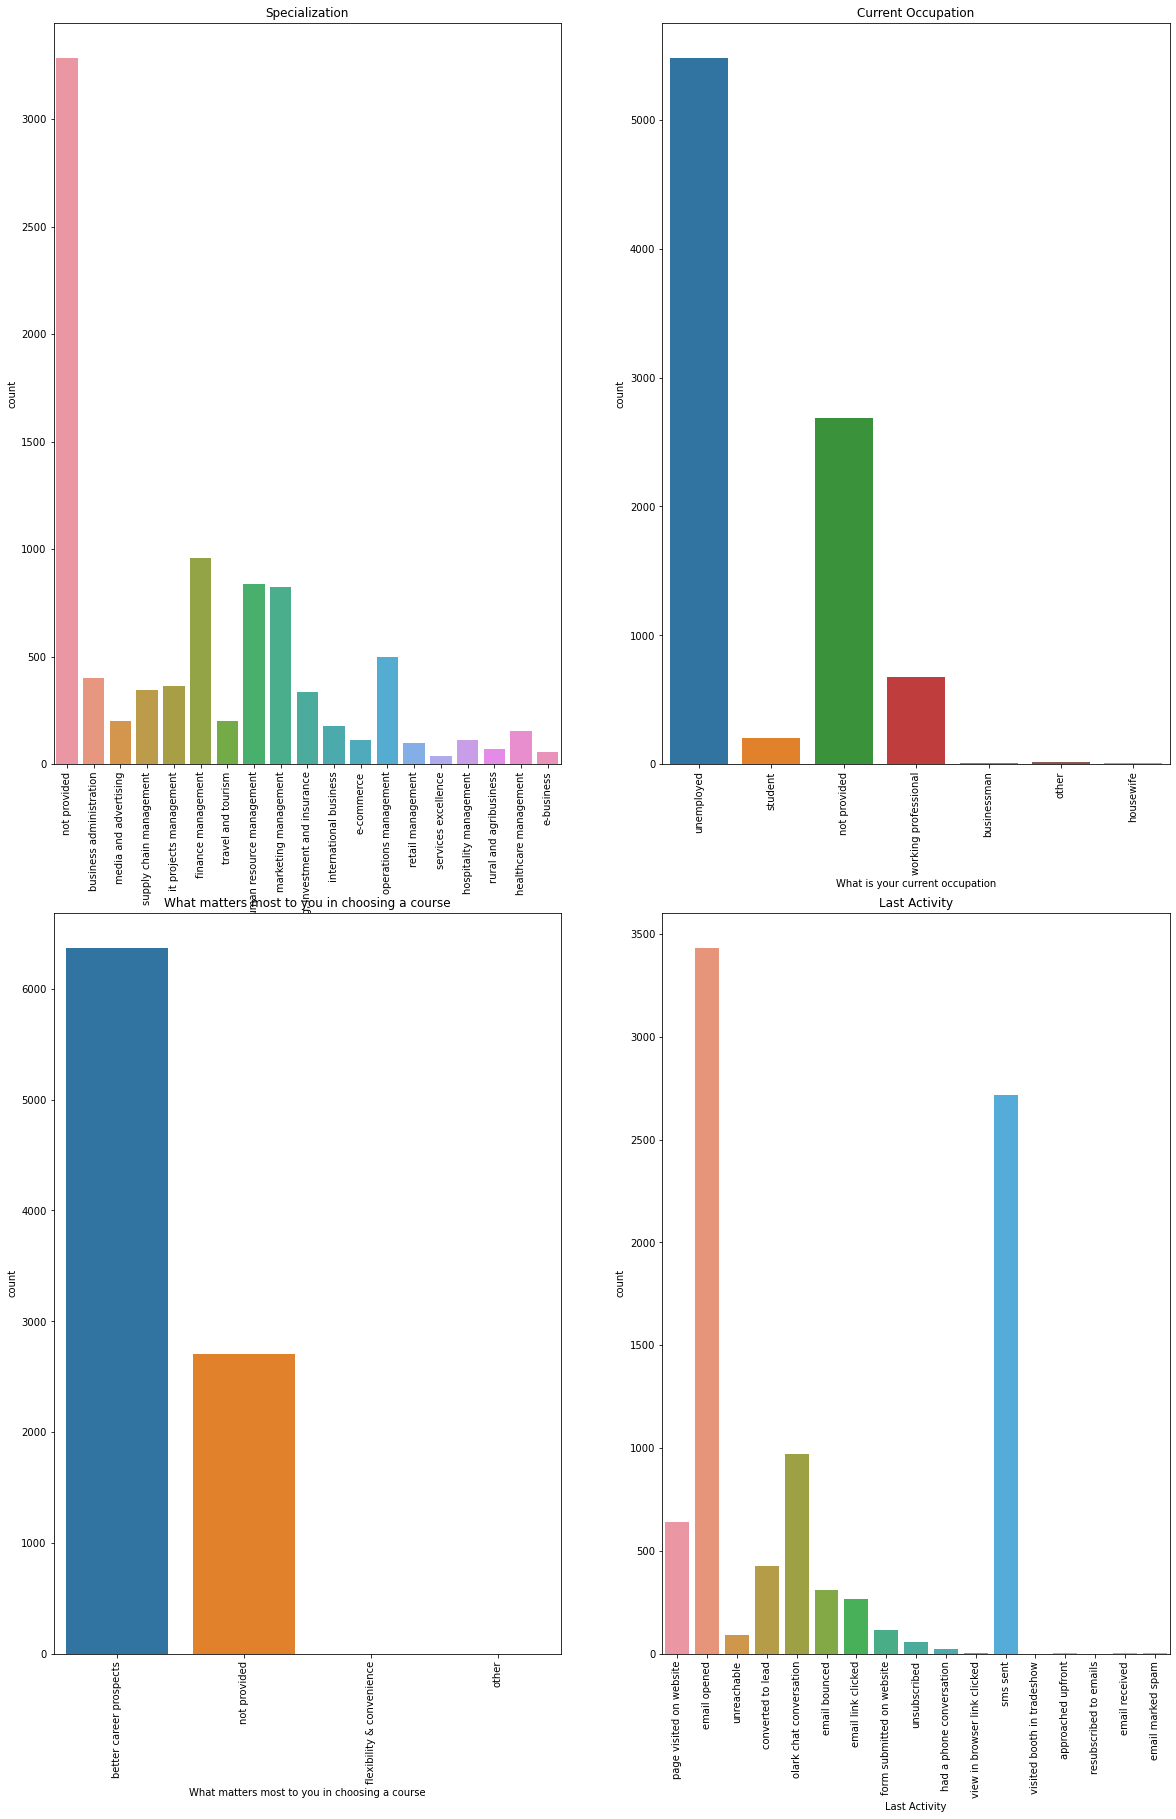

In [628]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(LS_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(LS_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(LS_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(LS_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

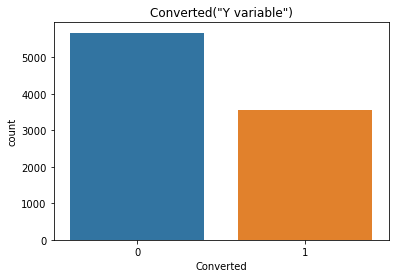

In [629]:
sns.countplot(LS['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### B.1.2 : Numerical Variables

In [630]:
LS_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

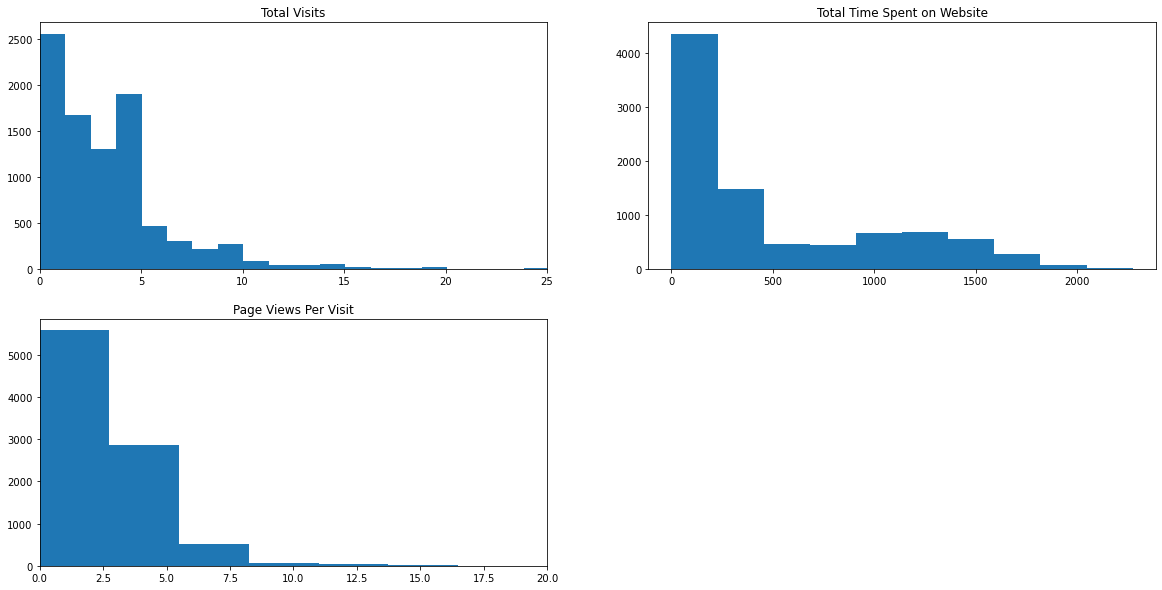

In [631]:
plt.figure(figsize = (20,10))
plt.subplot(221)
plt.hist(LS_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(LS_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(LS_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## B.2 : Relating all the categorical variables to Converted

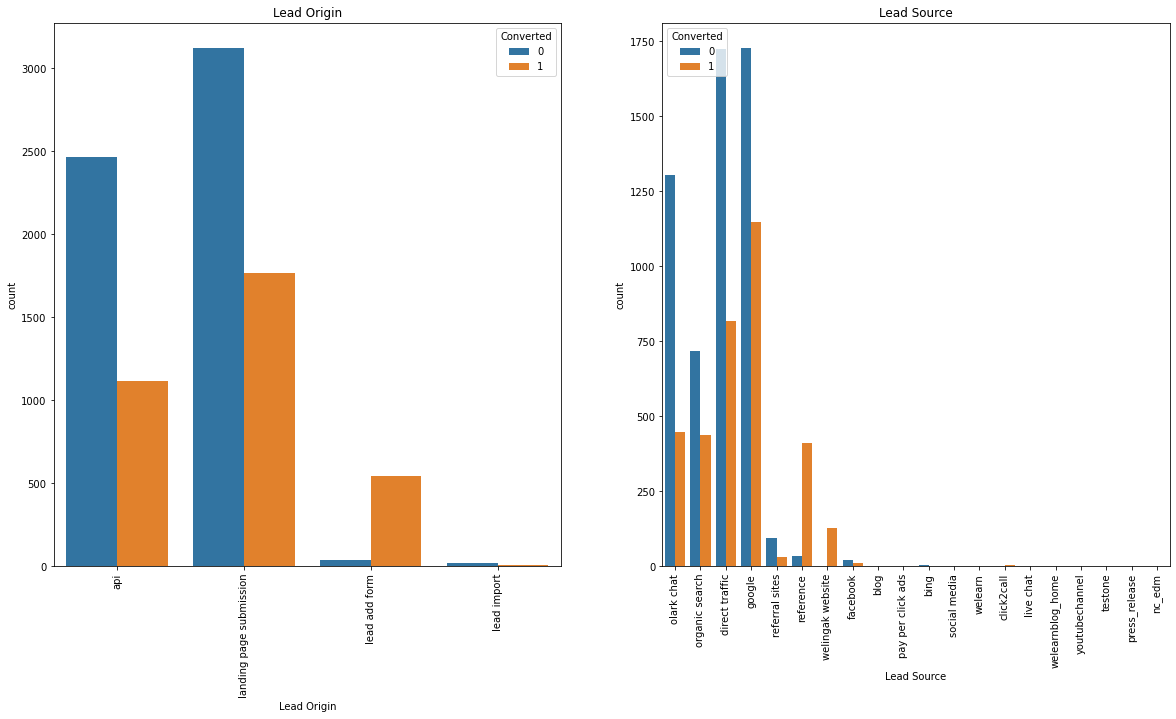

In [632]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

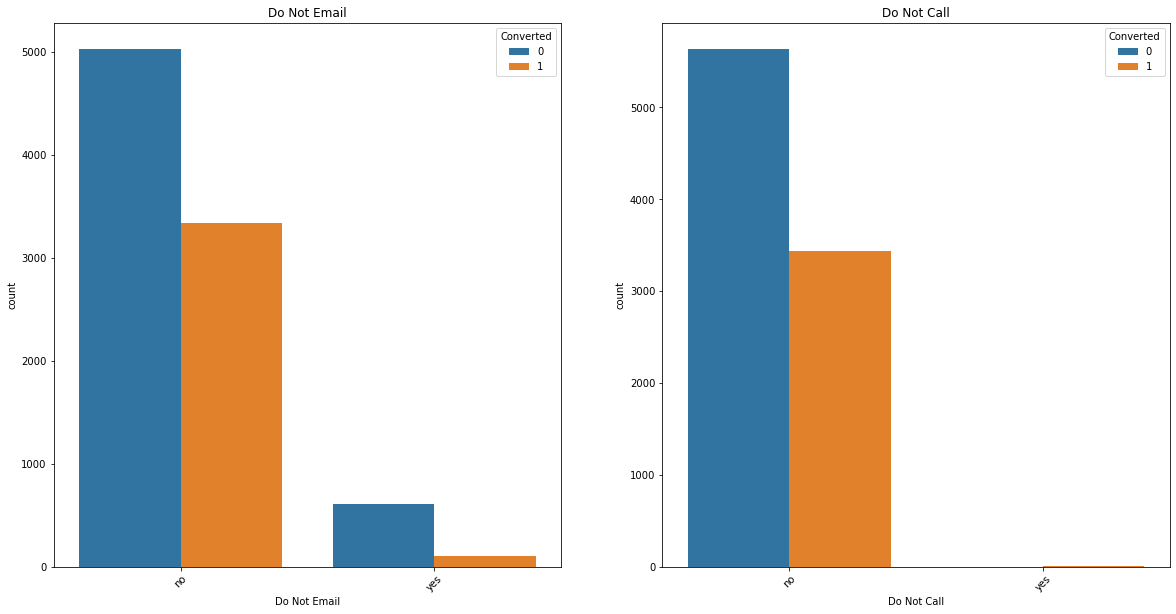

In [633]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 45)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 45)
plt.title('Do Not Call')
plt.show()

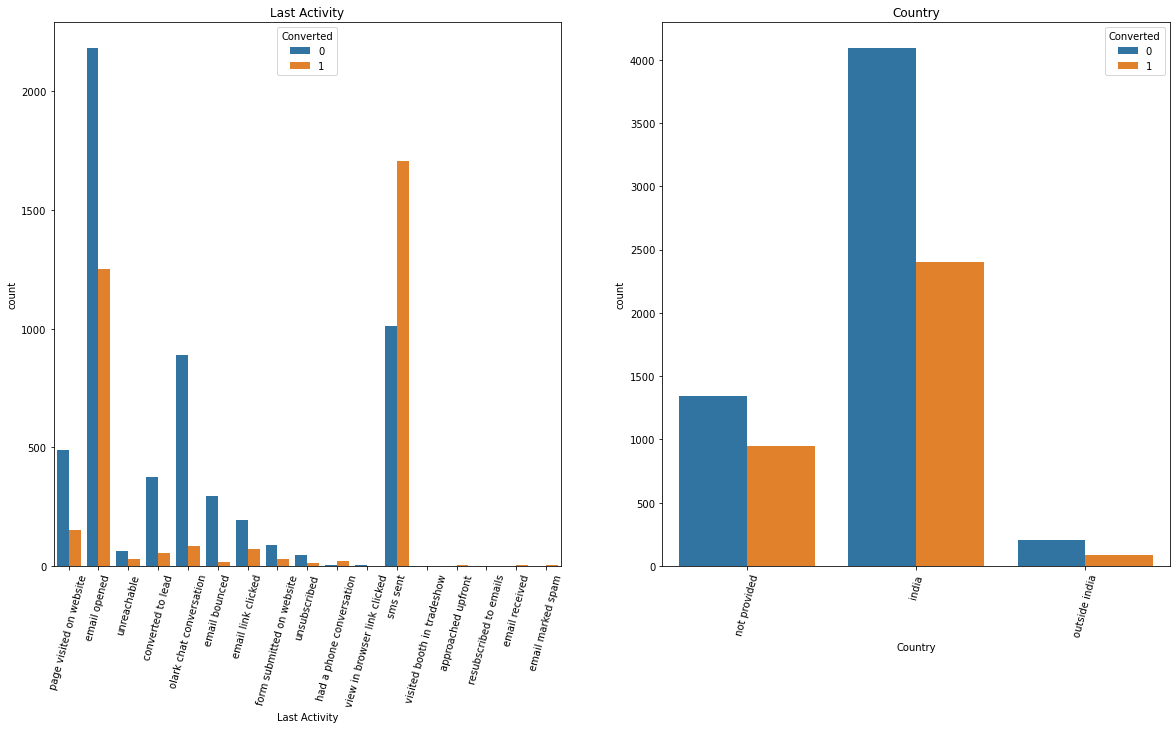

In [634]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 75)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 75)
plt.title('Country')
plt.show()

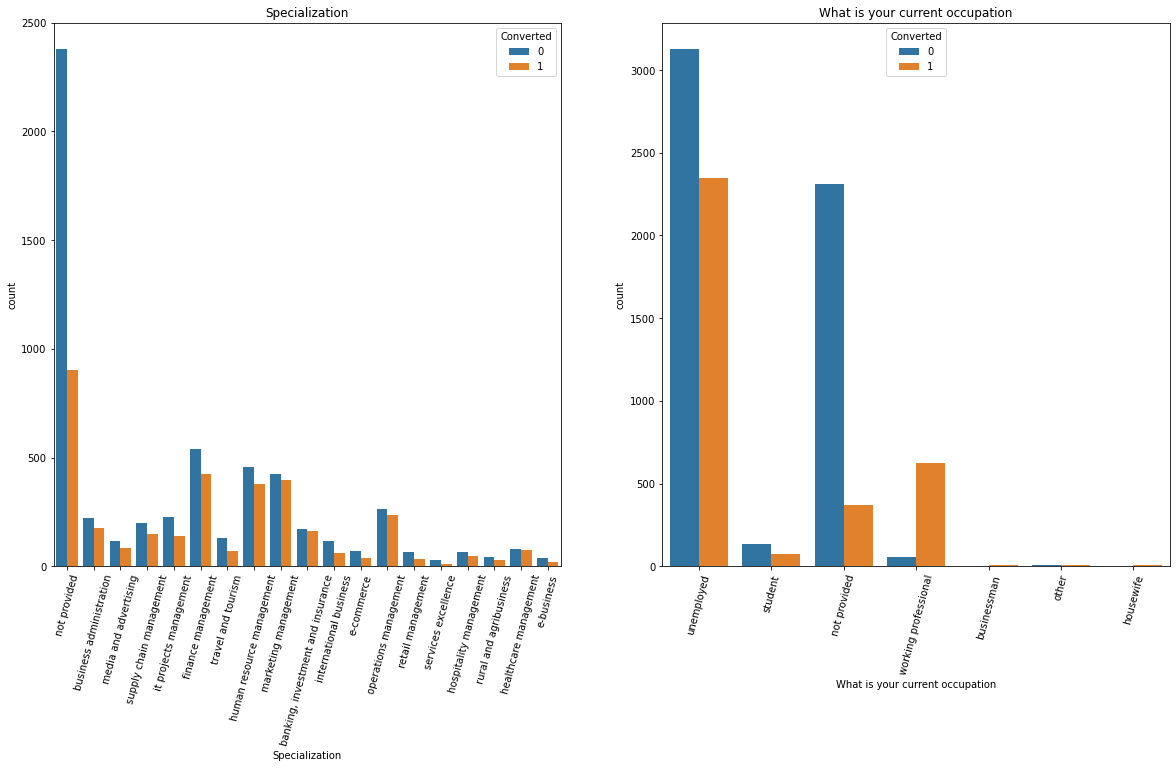

In [635]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 75)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 75)
plt.title('What is your current occupation')
plt.show()

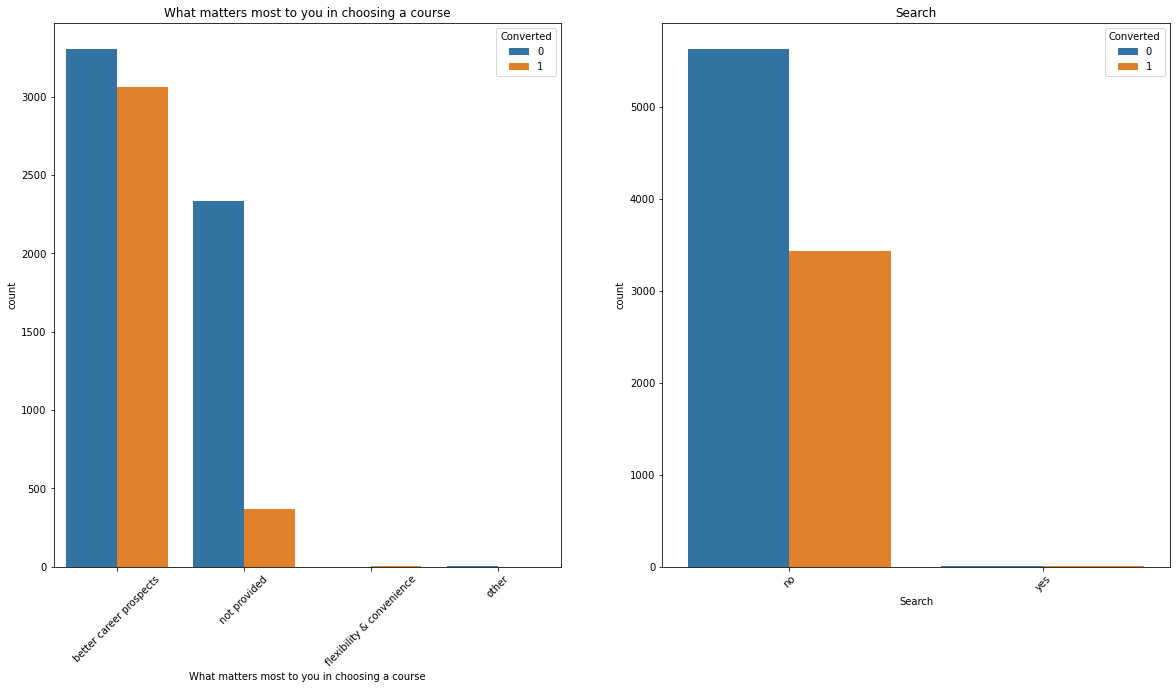

In [636]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 45)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 45)
plt.title('Search')
plt.show()

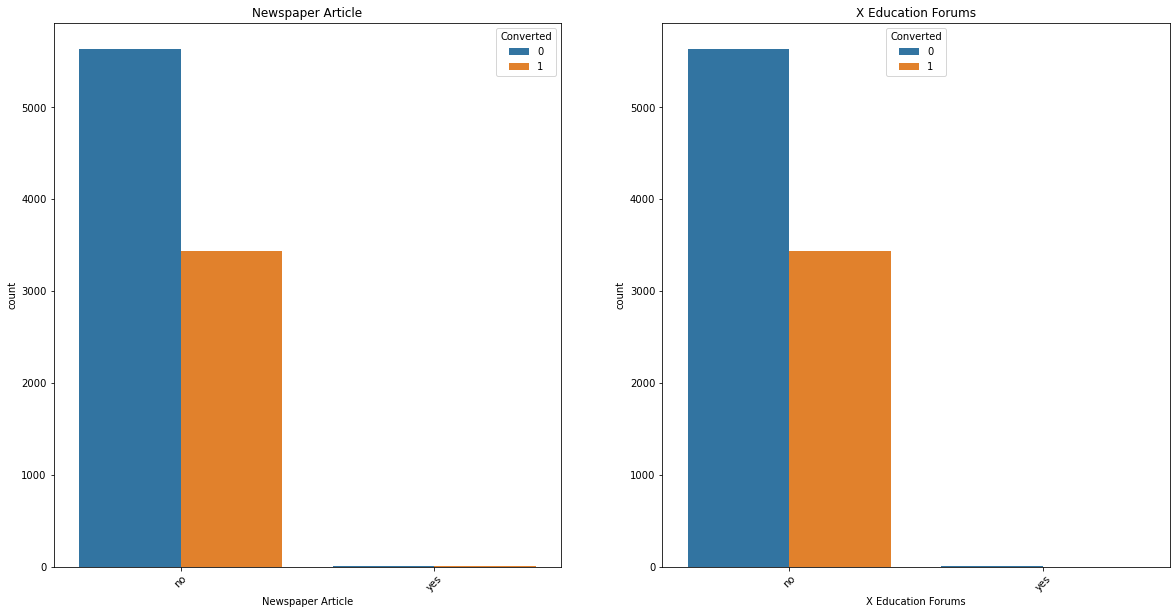

In [637]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 45)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 45)
plt.title('X Education Forums')
plt.show()

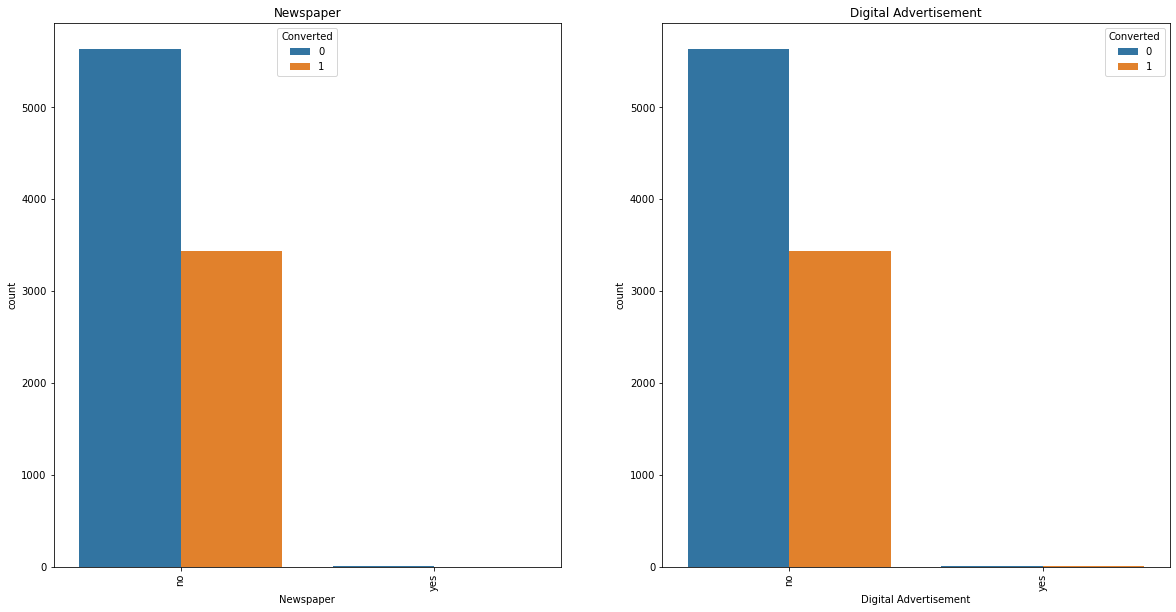

In [638]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

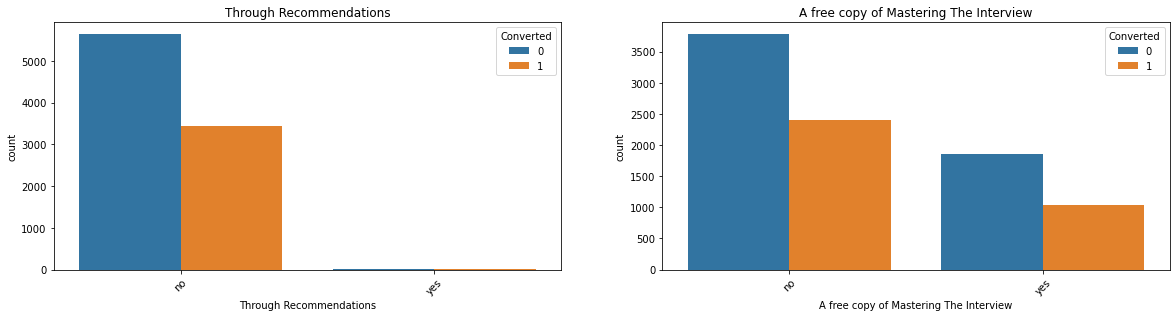

In [639]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 45)
plt.title('Through Recommendations')

plt.subplot(2,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 45)
plt.title('A free copy of Mastering The Interview')

plt.show()

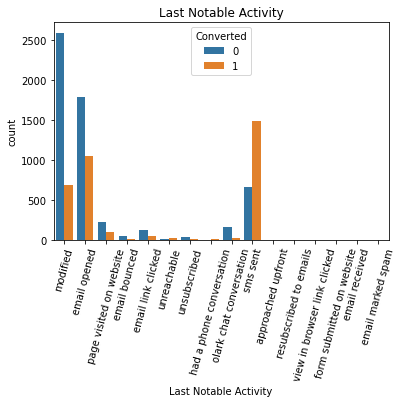

In [640]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= LS_final).tick_params(axis='x', rotation = 75)
plt.title('Last Notable Activity')
plt.show()

##  The correlation among varibles

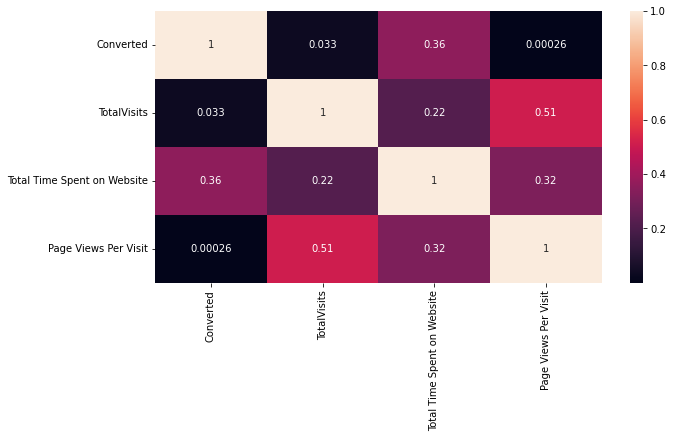

In [641]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(LS_final.corr(),annot=True)
plt.show()

*__It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.__*

In [642]:
numeric = LS_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


___There aren't any major outliers, so moving on to analysis___

# C : Dummy Variables

In [643]:
LS_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [644]:
LS_final.loc[:, LS_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [645]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(LS_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
LS_dum = pd.concat([LS_final, dummy], axis=1)
LS_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0


In [646]:
LS_dum.shape

(9074, 100)

In [647]:
LS_dum = LS_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
LS_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [648]:
LS_dum.shape

(9074, 81)

# D : Test-Train Split
## Import the required library

In [649]:
from sklearn.model_selection import train_test_split

# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [650]:
X = LS_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [651]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 80 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           9074 non-null   float64
 1   Total Time Spent on Website                           9074 non-null   int64  
 2   Page Views Per Visit                                  9074 non-null   float64
 3   Lead Origin_landing page submission                   9074 non-null   uint8  
 4   Lead Origin_lead add form                             9074 non-null   uint8  
 5   Lead Origin_lead import                               9074 non-null   uint8  
 6   Specialization_business administration                9074 non-null   uint8  
 7   Specialization_e-business                             9074 non-null   uint8  
 8   Specialization_e-commerce                             9074

In [672]:
# Putting the target variable in y
y = LS_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Split the dataset into 70% and 30% for train and test respectively

In [673]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [674]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


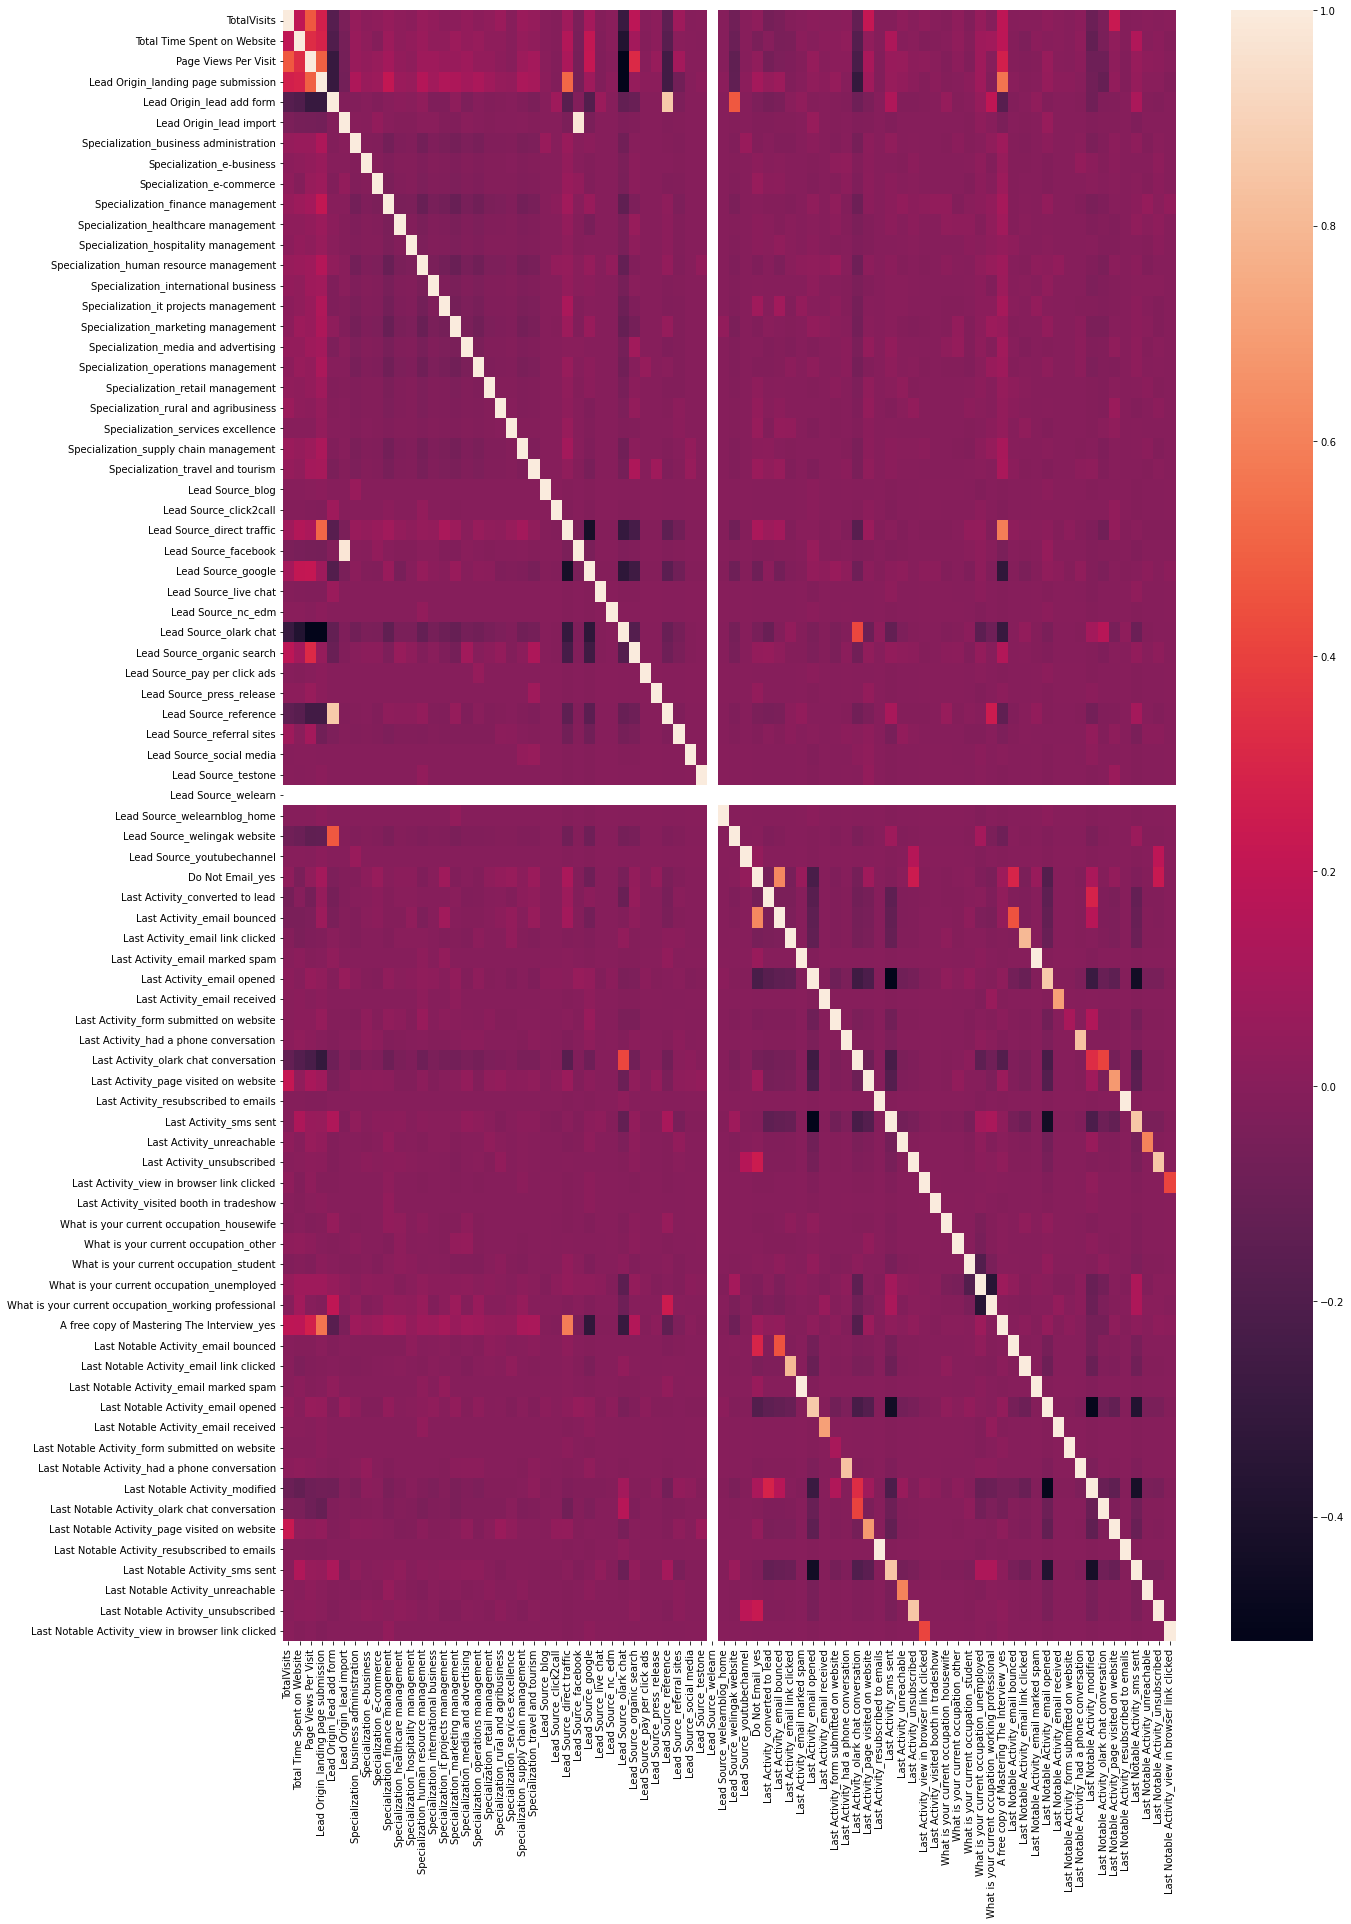

In [675]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___

# E :  Model Building

## Import 'LogisticRegression'
## Import RFE

In [676]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [677]:
# Import RFE
from sklearn.feature_selection import RFE

In [681]:
# Running RFE with 15 variables as output
rfe = RFE( estimator=LogisticRegression(), n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [682]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False])

In [683]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_landing page submission', False, 29),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 37),
 ('Specialization_e-business', False, 26),
 ('Specialization_e-commerce', False, 28),
 ('Specialization_finance management', False, 32),
 ('Specialization_healthcare management', False, 30),
 ('Specialization_hospitality management', False, 59),
 ('Specialization_human resource management', False, 33),
 ('Specialization_international business', False, 42),
 ('Specialization_it projects management', False, 31),
 ('Specialization_marketing management', False, 27),
 ('Specialization_media and advertising', False, 53),
 ('Specialization_operations management', False, 35),
 ('Specialization_retail management', False, 49),
 ('Specialization_rural and agribusiness', False, 36),
 ('Specialization_se

In [684]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

___All the variables selected by RFE, next statistics part (p-values and the VIFs).___

In [685]:
# Selecting columns selected by RFE
X_train = X_train[col]

# Importing statsmodels


In [686]:
import statsmodels.api as sm

In [687]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.4
Date:                Sun, 22 Jan 2023   Deviance:                       5394.7
Time:                        18:47:04   Pearson chi2:                 6.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2708      0.076     -3.555      0.000      -0.420      -0.122
Total Time Spent on Website                              3.9224      0.145     27.106      0.000       3.639       4.206
Lead Origin_lead add form                                3.4250      0.219     15.616      0.000       2.995       3.855
Lead Source_direct traffic                              -0.5432      0.078     -6.998      0.000      -0.695      -0.391
Lead Source_referral sites                              -0.6099      0.325     -1.879      0.060      -1.246       0.026
Lead Source_welingak website                             2.0931      0.758      2.760      0.006       0.607       3.580
Do Not Email_yes                                        -1.8350      0.175    -10.508      0.000      -2.177      -1.493
Last Activity_had a phone conversation                   1.7191      0.781      2.200      0.028       0.188       3.251
Last Activity_olark chat conversation                   -0.8061      0.187     -4.309      0.000      -1.173      -0.440
What is your current occupation_housewife               22.5067   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_working professional     2.6689      0.185     14.396      0.000       2.306       3.032
Last Notable Activity_email link clicked                -1.7261      0.258     -6.680      0.000      -2.233      -1.220
Last Notable Activity_email opened                      -1.3835      0.087    -15.893      0.000      -1.554      -1.213
Last Notable Activity_modified                          -1.9244      0.095    -20.260      0.000      -2.111      -1.738
Last Notable Activity_olark chat conversation           -1.6257      0.364     -4.462      0.000      -2.340      -0.912
Last Notable Activity_page visited on website           -1.6793      0.196     -8.561      0.000      -2.064      -1.295
========================================================================================================================
"""

### Importing 'variance_inflation_factor'

In [688]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [689]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_modified,1.74
7,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_lead add form,1.48
2,Lead Source_direct traffic,1.44
4,Lead Source_welingak website,1.33
13,Last Notable Activity_olark chat conversation,1.32
11,Last Notable Activity_email opened,1.30
9,What is your current occupation_working profes...,1.17
5,Do Not Email_yes,1.13


___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation_housewife'___

In [690]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [691]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.5
Date:                Sun, 22 Jan 2023   Deviance:                       5403.0
Time:                        18:58:14   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2715      0.076     -3.564      0.000      -0.421      -0.122
Total Time Spent on Website                              3.9239      0.145     27.139      0.000       3.641       4.207
Lead Origin_lead add form                                3.4468      0.219     15.738      0.000       3.018       3.876
Lead Source_direct traffic                              -0.5429      0.078     -7.000      0.000      -0.695      -0.391
Lead Source_referral sites                              -0.6120      0.325     -1.886      0.059      -1.248       0.024
Lead Source_welingak website                             2.0700      0.758      2.729      0.006       0.584       3.556
Do Not Email_yes                                        -1.8358      0.175    -10.509      0.000      -2.178      -1.493
Last Activity_had a phone conversation                   1.7194      0.781      2.200      0.028       0.188       3.251
Last Activity_olark chat conversation                   -0.8062      0.187     -4.310      0.000      -1.173      -0.440
What is your current occupation_working professional     2.6654      0.185     14.375      0.000       2.302       3.029
Last Notable Activity_email link clicked                -1.7148      0.257     -6.676      0.000      -2.218      -1.211
Last Notable Activity_email opened                      -1.3768      0.087    -15.829      0.000      -1.547      -1.206
Last Notable Activity_modified                          -1.9240      0.095    -20.255      0.000      -2.110      -1.738
Last Notable Activity_olark chat conversation           -1.6255      0.364     -4.461      0.000      -2.340      -0.911
Last Notable Activity_page visited on website           -1.6791      0.196     -8.560      0.000      -2.064      -1.295
========================================================================================================================
"""

In [692]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_modified,1.74
7,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_lead add form,1.47
2,Lead Source_direct traffic,1.44
4,Lead Source_welingak website,1.33
12,Last Notable Activity_olark chat conversation,1.32
10,Last Notable Activity_email opened,1.29
8,What is your current occupation_working profes...,1.17
5,Do Not Email_yes,1.13


___The VIF values seem fine but the p-values aren't. So removing 'Lead Source_referral sites'___

In [693]:
X_train.drop('Lead Source_referral sites', axis = 1, inplace = True)

In [694]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.4
Date:                Sun, 22 Jan 2023   Deviance:                       5406.9
Time:                        19:03:11   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2784      0.076     -3.659      0.000      -0.428      -0.129
Total Time Spent on Website                              3.9210      0.145     27.133      0.000       3.638       4.204
Lead Origin_lead add form                                3.4574      0.219     15.789      0.000       3.028       3.887
Lead Source_direct traffic                              -0.5319      0.077     -6.876      0.000      -0.683      -0.380
Lead Source_welingak website                             2.0696      0.758      2.729      0.006       0.583       3.556
Do Not Email_yes                                        -1.8355      0.175    -10.501      0.000      -2.178      -1.493
Last Activity_had a phone conversation                   1.6872      0.786      2.147      0.032       0.147       3.228
Last Activity_olark chat conversation                   -0.8147      0.187     -4.348      0.000      -1.182      -0.447
What is your current occupation_working professional     2.6609      0.185     14.351      0.000       2.298       3.024
Last Notable Activity_email link clicked                -1.7221      0.256     -6.714      0.000      -2.225      -1.219
Last Notable Activity_email opened                      -1.3790      0.087    -15.862      0.000      -1.549      -1.209
Last Notable Activity_modified                          -1.9297      0.095    -20.332      0.000      -2.116      -1.744
Last Notable Activity_olark chat conversation           -1.6098      0.364     -4.417      0.000      -2.324      -0.896
Last Notable Activity_page visited on website           -1.6922      0.196     -8.623      0.000      -2.077      -1.308
========================================================================================================================
"""

In [695]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_modified,1.73
6,Last Activity_olark chat conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_lead add form,1.47
2,Lead Source_direct traffic,1.43
3,Lead Source_welingak website,1.33
11,Last Notable Activity_olark chat conversation,1.32
9,Last Notable Activity_email opened,1.29
7,What is your current occupation_working profes...,1.17
4,Do Not Email_yes,1.13


___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___

# F :  Creating Prediction

In [696]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.183916
1012    0.586571
9226    0.099025
4750    0.834862
7987    0.512540
1281    0.810740
2880    0.161052
4971    0.917017
7536    0.784963
1248    0.474254
dtype: float64

In [697]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18391569, 0.58657132, 0.09902525, 0.83486235, 0.51254007,
       0.81073997, 0.16105248, 0.91701694, 0.78496251, 0.47425379])

In [698]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183916
1,0,0.586571
2,0,0.099025
3,1,0.834862
4,1,0.512540


In [699]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.183916,0
1,0,0.586571,1
2,0,0.099025,0
3,1,0.834862,1
4,1,0.512540,1


# G : Model Evaluation
### Importing metrics from sklearn for evaluation

In [700]:
from sklearn import metrics

In [701]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3431,  474],
       [ 833, 1613]], dtype=int64)

In [705]:
# Predicted   |  not_churn  |  churn
#-------------|             |
# Actual      |             |
#-----------------------------------------
# not_churn   |     3403    |   492
#------------------------------------------
# churn       |      729    |  1727

In [706]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7942056369075736

___That's around 80% accuracy with is a very good value___

In [707]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [708]:
# Calculating the sensitivity
TP/(TP+FN)

0.6594439901880621

In [709]:
# Calculating the specificity
TN/(TN+FP)

0.8786171574903969

___With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 66% and specificity of around 88%.___

# H : Optimise Cut off (ROC Curve)
### The previous cut off was randomely selected. Now to find the optimum one

In [710]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [711]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


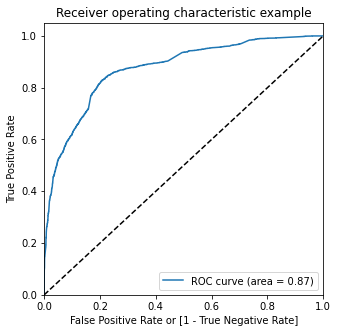

In [712]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

___The area under ROC curve is 0.87 which is a very good value.___

In [714]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0


In [716]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.556290,0.970155,0.297055
0.2,0.2,0.747126,0.882666,0.662228
0.3,0.3,0.799402,0.848324,0.768758
0.4,0.4,0.807117,0.790270,0.817670
0.5,0.5,0.794206,0.659444,0.878617
0.6,0.6,0.790427,0.576860,0.924200
0.7,0.7,0.781294,0.506132,0.953649
0.8,0.8,0.756731,0.412919,0.972087
0.9,0.9,0.711541,0.267784,0.989501


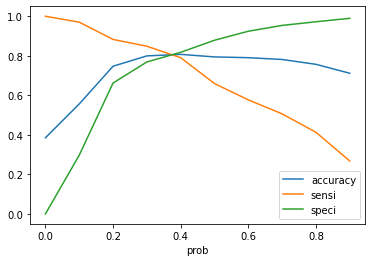

In [717]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

___From the graph it is visible that the optimal cut off is at 0.38.___

In [724]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0,1


In [725]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.807589356006928

In [726]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3166,  739],
       [ 483, 1963]], dtype=int64)

In [727]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [728]:
# Calculating the sensitivity
TP/(TP+FN)

0.8025347506132461

In [729]:
# Calculating the specificity
TN/(TN+FP)

0.8107554417413573

___With the current cut off as 0.38 we have accuracy, sensitivity and specificity of around 80%.___

# I : Prediction on Test set

In [732]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [733]:
# Substituting all the columns in the final train model
col = X_train.columns

In [734]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,1.0,0.000032,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.000305,0,1,0,0,0,0,1,0,1,0,0,0
7936,1.0,0.000015,0,0,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,0,0,1,0,0
3830,1.0,0.000033,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.000167,0,0,0,0,0,0,0,0,0,1,0,0
2879,1.0,0.000119,0,0,0,0,0,0,0,0,0,1,0,0
6501,1.0,0.000269,0,1,0,0,0,0,0,0,0,0,0,0
7155,1.0,0.000104,0,1,0,0,0,0,0,0,0,1,0,0


In [735]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.160119
1,1,0.616044
2,0,0.160111
3,1,0.777172
4,0,0.160120


In [748]:
# Making prediction using cut off 0.38
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.160119,0
1,1,0.616044,1
2,0,0.160111,0
3,1,0.777172,1
4,0,0.160120,0
...,...,...,...
2718,0,0.099084,0
2719,0,0.099067,0
2720,1,0.308047,0
2721,0,0.060678,0


In [749]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7719427102460521

In [750]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1611,  123],
       [ 498,  491]], dtype=int64)

In [780]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [781]:
# Calculating the sensitivity
TP/(TP+FN)

0.4954499494438827

In [782]:
# Calculating the specificity
TN/(TN+FP)

0.9302191464821222

___With the current cut off as 0.38 we have accuracy, sensitivity around 50% and specificity around 93%.___

# J : Precision-Recall

In [754]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3431,  474],
       [ 833, 1613]], dtype=int64)

In [756]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7728797316722569

In [757]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6594439901880621

___With the current cut off as 0.38 we have Precision around 77% and Recall around 66%___

# J.1 : Precision and recall tradeoff 

### Import precision_recall_curve

In [758]:
from sklearn.metrics import precision_recall_curve

In [759]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [760]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


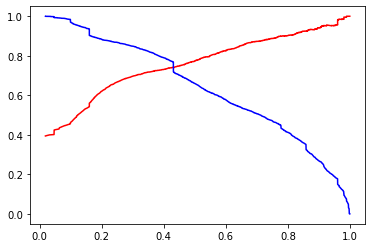

In [763]:
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

In [765]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183916,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586571,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.099025,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.834862,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.512540,1,1,1,1,1,1,1,0,0,0,0,1


In [766]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8080617225633758

In [767]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3235,  670],
       [ 549, 1897]], dtype=int64)

In [768]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [769]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7389949357226334

In [770]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7755519215044971

___With the current cut off as 0.42 we have Precision around 74% and Recall around 78%___

# K : Prediction on Test set

In [771]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.160119
1,1,0.616044
2,0,0.160111
3,1,0.777172
4,0,0.160120


In [772]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.160119,0
1,1,0.616044,1
2,0,0.160111,0
3,1,0.777172,1
4,0,0.160120,0
...,...,...,...
2718,0,0.099084,0
2719,0,0.099067,0
2720,1,0.308047,0
2721,0,0.060678,0


In [773]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7723099522585384

In [774]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1613,  121],
       [ 499,  490]], dtype=int64)

In [775]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7389949357226334

In [776]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7755519215044971

___With the current cut off as 0.42 we have Precision around 74% and Recall around 78%___

# L : 
# Conclusion :-
### It was found that the variables that mattered the most in the potential buyers are__ (In descending order) :

* 1. The total time spend on the Website.

* 2. When the Lead Origin_lead add form.

* 3. When the lead source was:
 *   a. Direct traffic,
 *   b. Welingak website.
 
* 4. When the click "Yes!" at Do Not Email option.
 
* 5. When the Last Activity was:
 *   a. had a phone conversation,
 *   b. olark chat conversation.

* 6. When their current occupation is as a working professional.

* 7. When the Last Notable Activity was :
 *   a. email link clicked,
 *   b. email opened,
 *   c. modified,
 *   d. olark chat conversation,
 *   e. page visited on website.

### Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.